<a href="https://colab.research.google.com/github/lyeslehara1996/Colab/blob/Dev/SentimentAnalysisModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
#declaration des module 
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
import pandas as pd 
import re 
import nltk
import matplotlib.pyplot as plt
from sklearn.preprocessing  import MinMaxScaler
import numpy as np

from nltk.tokenize import TweetTokenizer
from nltk import FreqDist
import string 
SAVE_FILE = False

In [ ]:
#affichage de data frame 

df=pd.read_excel('/content/SemEval2017.xlsx')
df.head()

**Prétraitement des donnee**

In [3]:

df.drop("Unnamed: 3", axis=1, inplace=True)
df.drop("Unnamed: 4", axis=1, inplace=True)
df.drop("Unnamed: 5", axis=1, inplace=True)
df.drop("Unnamed: 6", axis=1, inplace=True)
df.drop("Unnamed: 7", axis=1, inplace=True)
df.drop("Unnamed: 8", axis=1, inplace=True)
df.drop("Unnamed: 9", axis=1, inplace=True)
df.drop("Unnamed: 10", axis=1, inplace=True)
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)
df.drop("Unnamed: 13", axis=1, inplace=True)
df.drop("Unnamed: 14", axis=1, inplace=True)
df.drop("Unnamed: 15", axis=1, inplace=True)

In [4]:
df.head()

,id,polariy,Comments
0,619950566786113024,neutral,"Picturehouse's, Pink Floyd's, 'Roger Waters: T..."
1,619969366986235008,neutral,Order Go Set a Watchman in store or through ou...
2,619971047195044992,negative,If these runway renovations at the airport pre...
3,619974445185302016,neutral,If you could ask an onstage interview question...
4,619987808317406976,positive,A portion of book sales from our Harper Lee/Go...


In [5]:
df.polariy.value_counts()

neutral     10342
positive     7059
negative     3231
Name: polariy, dtype: int64

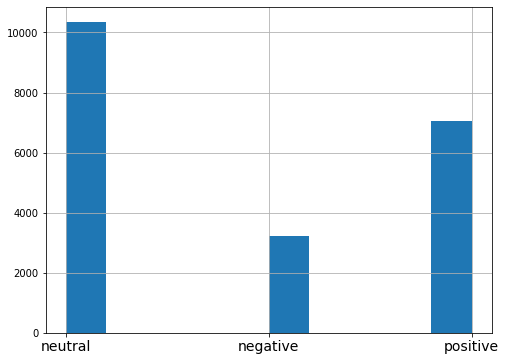

In [6]:
plt.figure(figsize=(8,6))
df.polariy.hist(xlabelsize=14)
plt.show()

In [7]:
df_clean = df

In [8]:
df_clean.Comments=df_clean.Comments.str.lower()
df_clean.head()

,id,polariy,Comments
0,619950566786113024,neutral,"picturehouse's, pink floyd's, 'roger waters: t..."
1,619969366986235008,neutral,order go set a watchman in store or through ou...
2,619971047195044992,negative,if these runway renovations at the airport pre...
3,619974445185302016,neutral,if you could ask an onstage interview question...
4,619987808317406976,positive,a portion of book sales from our harper lee/go...


In [10]:
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'https?:\/\/\S+', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'{link}', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'&[a-z]+;', ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r"[^a-z]", ' ', str(x)))
df_clean.Comments = df_clean.Comments.apply(lambda x: re.sub(r'@mention', ' ', x))
df_clean.Comments = df_clean.Comments.apply(lambda x: " ".join(x.lower() for x in str(x).split()  if len(x)>2 ))

In [11]:
df_clean

,id,polariy,Comments
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...
1,619969366986235008,neutral,order set watchman store through our website b...
2,619971047195044992,negative,these runway renovations the airport prevent f...
3,619974445185302016,neutral,you could ask onstage interview question miss ...
4,619987808317406976,positive,portion book sales from our harper lee set wat...
...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal from what think you asking ord...
20629,681879579129200000,positive,iran ranks liver surgeries allah bless the cou...
20630,681883903259357056,neutral,hours before arrived saudi arabia tuesday turk...
20631,681904976860327040,negative,vanityfair alex kim kardashian worth how love ...


In [12]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
df_clean['Clean_Comment'] = df_clean['Comments'].apply(tknzr.tokenize)
df_clean.head()

,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...,"[picturehouse, pink, floyd, roger, waters, the..."
1,619969366986235008,neutral,order set watchman store through our website b...,"[order, set, watchman, store, through, our, we..."
2,619971047195044992,negative,these runway renovations the airport prevent f...,"[these, runway, renovations, the, airport, pre..."
3,619974445185302016,neutral,you could ask onstage interview question miss ...,"[you, could, ask, onstage, interview, question..."
4,619987808317406976,positive,portion book sales from our harper lee set wat...,"[portion, book, sales, from, our, harper, lee,..."


In [13]:
if SAVE_FILE:
    df_clean.to_excel('/content/savedData.xlsx', index=False)
   

In [14]:
 data=pd.read_excel('/content/savedData.xlsx')
 data

,id,polariy,Comments,Clean_Comment
0,619950566786113024,neutral,picturehouse pink floyd roger waters the walll...,"['picturehouse', 'pink', 'floyd', 'roger', 'wa..."
1,619969366986235008,neutral,order set watchman store through our website b...,"['order', 'set', 'watchman', 'store', 'through..."
2,619971047195044992,negative,these runway renovations the airport prevent f...,"['these', 'runway', 'renovations', 'the', 'air..."
3,619974445185302016,neutral,you could ask onstage interview question miss ...,"['you', 'could', 'ask', 'onstage', 'interview'..."
4,619987808317406976,positive,portion book sales from our harper lee set wat...,"['portion', 'book', 'sales', 'from', 'our', 'h..."
...,...,...,...,...
20628,681877834982232064,neutral,shaquillehoneal from what think you asking ord...,"['shaquillehoneal', 'from', 'what', 'think', '..."
20629,681879579129200000,positive,iran ranks liver surgeries allah bless the cou...,"['iran', 'ranks', 'liver', 'surgeries', 'allah..."
20630,681883903259357056,neutral,hours before arrived saudi arabia tuesday turk...,"['hours', 'before', 'arrived', 'saudi', 'arabi..."
20631,681904976860327040,negative,vanityfair alex kim kardashian worth how love ...,"['vanityfair', 'alex', 'kim', 'kardashian', 'w..."


In [15]:
data =  df_clean[['Clean_Comment', 'polariy']]

In [16]:
data.head()


,Clean_Comment,polariy
0,"[picturehouse, pink, floyd, roger, waters, the...",neutral
1,"[order, set, watchman, store, through, our, we...",neutral
2,"[these, runway, renovations, the, airport, pre...",negative
3,"[you, could, ask, onstage, interview, question...",neutral
4,"[portion, book, sales, from, our, harper, lee,...",positive


In [17]:
#afficher la dimention de dataframe 
data.shape

(20633, 2)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#preparation des donnee
X_train, X_test, y_train, y_test = train_test_split(data['Clean_Comment'].values, 
                                                    data['polariy'].values,
                                                   test_size = 0.3)

In [21]:
X_train.shape



(14443,)

In [22]:
y_train.shape

(14443,)

In [50]:
print(' Text: ', X_train[0])
print('Polarity: ', y_train[0])

 Text:  ['ryannichols', 'there', 'one', 'thing', 'can', 'guarantee', 'monday', 'janet', 'jackson', 'worship', 'which', 'always', 'here', 'for']
Polarity:  positive


In [51]:
#convertir au chiffre pour avoir implementer le model 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [61]:
#initialization du tokenizer

max_word = 200
tokenizer = Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(X_train)

In [62]:
wordidx = tokenizer.word_index
V=len(wordidx)
V

22349

In [63]:
#transformer des sequence de mots en sequence de chiffre 

train_seq_int = tokenizer.texts_to_sequences(X_train)
test_seq_int = tokenizer.texts_to_sequences(X_test)



In [68]:

print('Training sequence: ', train_seq_int[0])
print('Testing sequence: ', test_seq_int[0])


Training sequence:  [57, 31, 25, 33, 91, 3]
Testing sequence:  [189, 23, 1]


In [69]:
pad_train=pad_sequences(train_seq_int)
T=pad_train.shape[0]
T

14443

In [70]:
pad_test=pad_sequences(test_seq_int,maxlen=T)
pad_test.shape[0]


6190

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [82]:
embed_dim = 128
lstm_units = 100
model=Sequential()
model.add(Embedding(max_word, embed_dim,input_length =pad_train.shape[0]))
model.add (Dense (3, activation='softmax'));
model.add(LSTM(units=15, return_sequences=True))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 14443, 128)        25600     
_________________________________________________________________
dense_7 (Dense)              (None, 14443, 3)          387       
_________________________________________________________________
lstm_7 (LSTM)                (None, 14443, 15)         1140      
Total params: 27,127
Trainable params: 27,127
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
r=model.fit(pad_train ,y_train, epochs=2, validation_data=(pad_test, y_test))


Epoch 1/2


ValueError: ignored